 dự đoán mức tiêu thụ điện năng (Consumption) hoặc sản lượng điện năng (Production) dựa trên các yếu tố khác như:

Các nguồn năng lượng khác nhau (nuclear, wind, hydroelectric, oil and gas, coal, solar, biomass)
Thời gian (giờ, ngày, tháng, mùa)
Với các đặc trưng này, mục tiêu là xây dựng các mô hình học máy để dự đoán tiêu thụ hoặc sản lượng điện năng trong tương lai dựa trên các yếu tố đầu vào (như các nguồn năng lượng và thời gian).

In [44]:
import pandas as pd
import numpy as np
# Load the uploaded CSV file
file_path = 'data/electricityConsumptionAndProductioction.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46011 entries, 0 to 46010
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DateTime       46011 non-null  object
 1   Consumption    46011 non-null  int64 
 2   Production     46011 non-null  int64 
 3   Nuclear        46011 non-null  int64 
 4   Wind           46011 non-null  int64 
 5   Hydroelectric  46011 non-null  int64 
 6   Oil and Gas    46011 non-null  int64 
 7   Coal           46011 non-null  int64 
 8   Solar          46011 non-null  int64 
 9   Biomass        46011 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 3.5+ MB


In [45]:
data.head()


,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


In [46]:
data.describe()

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
count,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000
mean,6587.616440,6518.645628,1291.177501,792.310882,1857.052444,1171.890418,1193.157332,156.688031,55.851862
std,1043.654923,986.805018,236.549637,675.812712,692.592157,434.748917,320.449368,229.502650,14.235554
min,3889.000000,3315.000000,562.000000,-26.000000,175.000000,198.000000,279.000000,0.000000,17.000000
25%,5773.000000,5814.000000,1347.000000,236.000000,1347.000000,858.000000,962.000000,0.000000,45.000000
50%,6552.000000,6462.000000,1383.000000,592.000000,1747.000000,1211.000000,1172.000000,2.000000,57.000000
75%,7321.000000,7176.000000,1405.000000,1205.000000,2265.000000,1511.000000,1406.000000,280.000000,67.000000
max,9615.000000,9886.000000,1457.000000,2811.000000,4434.000000,2141.000000,2537.000000,1137.000000,89.000000


## mô tả dữ liệu 
1. DateTime
- Mô tả: Cột này chứa thông tin về thời gian (theo giờ) của mỗi bản ghi.
- Kiểu dữ liệu: Datetime (Thời gian).
- Cách sử dụng: Cột này sẽ giúp mô hình nhận diện các mẫu thay đổi theo thời gian (ví dụ: mùa trong năm, ngày trong tuần, giờ trong ngày).

2. Consumption
- Mô tả: Mức tiêu thụ điện năng (kWh) trong một khoảng thời gian nhất định (1 giờ). Đây là mục tiêu chính trong bài toán dự đoán.
- Kiểu dữ liệu: Numeric (Số thực).
- Cách sử dụng: Đây là biến mục tiêu (target variable) nếu bạn muốn dự đoán mức tiêu thụ điện trong tương lai dựa trên các nguồn năng lượng và thời gian.

3. Production
- Mô tả: Mức sản lượng điện năng (kWh) được sản xuất trong một khoảng thời gian (1 giờ).
- Kiểu dữ liệu: Numeric (Số thực).
- Cách sử dụng: Có thể dùng để dự đoán sản lượng điện năng trong tương lai.

4. Nuclear
- Mô tả: Mức điện năng được sản xuất từ nguồn năng lượng hạt nhân (kWh) trong 1 giờ.
- Kiểu dữ liệu: Numeric (Số thực).
- Cách sử dụng: Là một trong các đặc trưng (features) dùng để dự đoán mức tiêu thụ hoặc sản lượng điện năng. Sự thay đổi trong sản xuất năng lượng hạt nhân có thể ảnh hưởng đến sản lượng và tiêu thụ điện.

5. Wind
- Mô tả: Mức điện năng được sản xuất từ năng lượng gió (kWh) trong 1 giờ.
- Kiểu dữ liệu: Numeric (Số thực).
- Cách sử dụng: Là một đặc trưng quan trọng trong việc dự đoán sản lượng hoặc tiêu thụ điện, đặc biệt trong các khu vực có nguồn gió mạnh.

6. Hydroelectric
- Mô tả: Mức điện năng được sản xuất từ nguồn thủy điện (kWh) trong 1 giờ.
- Kiểu dữ liệu: Numeric (Số thực).
- Cách sử dụng: Cũng là một đặc trưng quan trọng, đặc biệt ở những khu vực có nguồn thủy điện dồi dào. Sự thay đổi trong sản lượng thủy điện có thể ảnh hưởng đến sản lượng điện tổng thể.

7. Oil and Gas
- Mô tả: Mức điện năng được sản xuất từ nguồn năng lượng dầu và khí (kWh) trong 1 giờ.
- Kiểu dữ liệu: Numeric (Số thực).
- Cách sử dụng: Một nguồn năng lượng truyền thống có thể ảnh hưởng đến cả sản lượng và tiêu thụ điện năng. Đây là một đặc trưng có thể giúp mô hình nhận diện mối quan hệ giữa năng lượng hóa thạch và các yếu tố khác.

8. Coal
- Mô tả: Mức điện năng được sản xuất từ nguồn năng lượng than đá (kWh) trong 1 giờ.
- Kiểu dữ liệu: Numeric (Số thực).
- Cách sử dụng: Cũng là một nguồn năng lượng truyền thống khác, đặc trưng này có thể giúp mô hình dự đoán ảnh hưởng của việc sử dụng than đá đến sản lượng điện năng.

9. Solar
- Mô tả: Mức điện năng được sản xuất từ năng lượng mặt trời (kWh) trong 1 giờ.
- Kiểu dữ liệu: Numeric (Số thực).
- Cách sử dụng: Nguồn năng lượng tái tạo này có thể ảnh hưởng đến sản lượng điện, đặc biệt trong những khu vực có nhiều ánh sáng mặt trời. Đây là một đặc trưng quan trọng để xem xét trong mô hình.

10. Biomass
- Mô tả: Mức điện năng được sản xuất từ nguồn năng lượng sinh khối (kWh) trong 1 giờ.
- Kiểu dữ liệu: Numeric (Số thực).
- Cách sử dụng: Là nguồn năng lượng tái tạo khác, sinh khối cũng ảnh hưởng đến sản lượng và tiêu thụ điện năng. Mức sản xuất từ sinh khối sẽ là một yếu tố quan trọng trong việc dự đoán.

11. DayOfWeek
- Mô tả: Chỉ số ngày trong tuần, với giá trị từ 0 đến 6 (0 = Thứ Hai, 6 = Chủ Nhật).
- Kiểu dữ liệu: Numeric (Số nguyên).
- Cách sử dụng: Đặc trưng này giúp mô hình học các xu hướng thay đổi theo ngày trong tuần, ví dụ, nhu cầu điện có thể cao vào các ngày làm việc so với cuối tuần.

12. Hour
- Mô tả: Chỉ số giờ trong ngày, với giá trị từ 0 đến 23 (0 = 00:00 AM, 23 = 11:00 PM).
- Kiểu dữ liệu: Numeric (Số nguyên).
- Cách sử dụng: Đặc trưng này giúp mô hình nhận diện các thay đổi theo giờ trong ngày, ví dụ, nhu cầu điện có thể cao vào giờ cao điểm như buổi sáng hoặc buổi tối.

## tiền sử lý dữ liệu 

In [49]:
data.duplicated().sum()

4

In [50]:
duplicates = data[data.duplicated()]

# Hiển thị các bản ghi trùng lặp
print(duplicates)

                  DateTime  Consumption  Production  Nuclear  Wind  \
7180   2019-10-27 03:00:00         5196        4459     1373    74   
15917  2020-10-25 03:00:00         5220        5412     1418  1188   
24822  2021-10-31 03:00:00         5341        5258     1415   141   
33559  2022-10-30 03:00:00         4503        5269     1384   544   

       Hydroelectric  Oil and Gas  Coal  Solar  Biomass  
7180             725          719  1515      0       50  
15917           1098          594  1048      0       65  
24822            934         1314  1393      0       58  
33559           1289          924  1073      0       52  


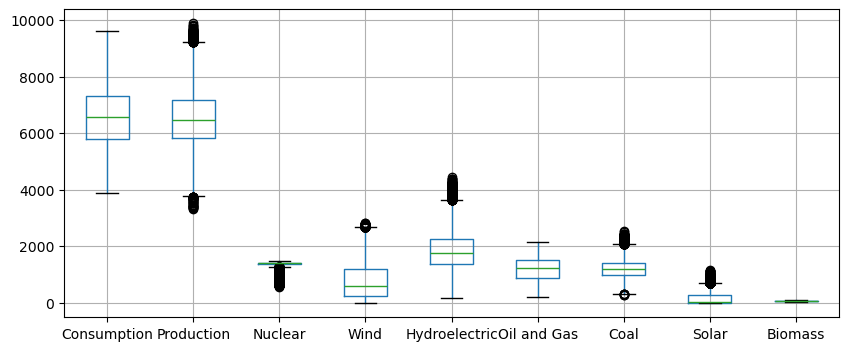

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
data.boxplot()
plt.ylabel('')
plt.show()

In [52]:
# Hàm để xác định và hiển thị ngoại lai
def show_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Hiển thị các giá trị ngoại lai
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f'Ngoại lai ở cột {column}:')
    return outliers[[column]]

# Hiển thị ngoại lai cho các cột charges
outliers_Nuclear = show_outliers(data, 'Nuclear')
outliers_Wind = show_outliers(data, 'Wind')
outliers_Hydroelectric = show_outliers(data, 'Hydroelectric')
outliers_Coal = show_outliers(data, 'Coal')
outliers_Solar = show_outliers(data, 'Solar')

# In các giá trị ngoại lai
print(outliers_Nuclear)
print(outliers_Wind)
print(outliers_Hydroelectric)
print(outliers_Coal)
print(outliers_Solar)


Ngoại lai ở cột Nuclear:
Ngoại lai ở cột Wind:
Ngoại lai ở cột Hydroelectric:
Ngoại lai ở cột Coal:
Ngoại lai ở cột Solar:
       Nuclear
2935      1252
2936       960
2937       745
2938       655
2939       644
...        ...
45374     1071
45375     1076
45376     1117
45377     1179
45378     1257

[6387 rows x 1 columns]
       Wind
76     2672
77     2715
78     2704
1265   2680
1266   2811
...     ...
37478  2690
42786  2670
45526  2751
45527  2666
45529  2680

[149 rows x 1 columns]
       Hydroelectric
3032            3808
3033            3712
3041            3853
3042            3780
3043            3847
...              ...
39264           3761
39265           3762
42791           3697
42792           3787
42793           3672

[680 rows x 1 columns]
       Coal
179    2094
180    2091
181    2112
182    2111
200    2075
...     ...
11550   294
11551   279
11552   280
11553   295
11554   293

[318 rows x 1 columns]
       Solar
1139     725
1140     771
1141     753
1163    

In [53]:
def replace_outliers_with_bounds(data, column):
    # Tính toán các giá trị Q1 và Q3
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    # Tính khoảng tứ phân vị (IQR)
    IQR = Q3 - Q1
    # Tính các giới hạn dưới và trên
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Thay thế các giá trị ngoại lệ nhỏ hơn lower_bound bằng lower_bound
    data.loc[data[column] < lower_bound, column] = lower_bound
    # Thay thế các giá trị ngoại lệ lớn hơn upper_bound bằng upper_bound
    data.loc[data[column] > upper_bound, column] = upper_bound
    
    return data



In [54]:
columns_to_replace = ['Nuclear', 'Wind', 'Hydroelectric', 'Coal', 'Solar']

for column in columns_to_replace:
    data_out = replace_outliers_with_bounds(data, column)

# Kiểm tra lại ngoại lai

print(show_outliers(data_out, 'Nuclear'))
print(show_outliers(data_out, 'Wind'))
print(show_outliers(data_out, 'Hydroelectric'))
print(show_outliers(data_out, 'Coal'))
print(show_outliers(data_out, 'Solar'))


Ngoại lai ở cột Nuclear:
Empty DataFrame
Columns: [Nuclear]
Index: []
Ngoại lai ở cột Wind:
Empty DataFrame
Columns: [Wind]
Index: []
Ngoại lai ở cột Hydroelectric:
Empty DataFrame
Columns: [Hydroelectric]
Index: []
Ngoại lai ở cột Coal:
Empty DataFrame
Columns: [Coal]
Index: []
Ngoại lai ở cột Solar:
Empty DataFrame
Columns: [Solar]
Index: []


C:\Users\chien\AppData\Local\Temp\ipykernel_22084\2576204350.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1217.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[column] < lower_bound, column] = lower_bound


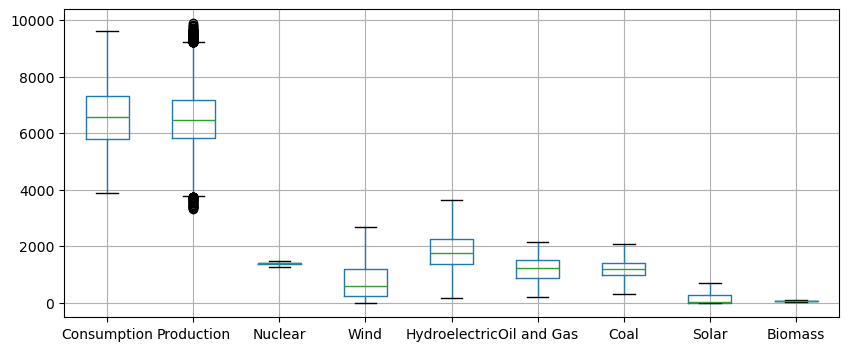

In [55]:
plt.figure(figsize=(10,4))
data_out.boxplot()
plt.ylabel('')
plt.show()

In [56]:
data_out.describe()

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
count,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000,46011.000000
mean,6587.616440,6518.645628,1366.780900,792.171687,1854.037100,1171.890418,1192.325574,154.820825,55.851862
std,1043.654923,986.805018,51.445325,675.421285,684.065161,434.748917,317.893422,224.553997,14.235554
min,3889.000000,3315.000000,1260.000000,-26.000000,175.000000,198.000000,296.000000,0.000000,17.000000
25%,5773.000000,5814.000000,1347.000000,236.000000,1347.000000,858.000000,962.000000,0.000000,45.000000
50%,6552.000000,6462.000000,1383.000000,592.000000,1747.000000,1211.000000,1172.000000,2.000000,57.000000
75%,7321.000000,7176.000000,1405.000000,1205.000000,2265.000000,1511.000000,1406.000000,280.000000,67.000000
max,9615.000000,9886.000000,1457.000000,2658.500000,3642.000000,2141.000000,2072.000000,700.000000,89.000000


In [57]:

data_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46011 entries, 0 to 46010
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DateTime       46011 non-null  object 
 1   Consumption    46011 non-null  int64  
 2   Production     46011 non-null  int64  
 3   Nuclear        46011 non-null  int64  
 4   Wind           46011 non-null  float64
 5   Hydroelectric  46011 non-null  int64  
 6   Oil and Gas    46011 non-null  int64  
 7   Coal           46011 non-null  int64  
 8   Solar          46011 non-null  int64  
 9   Biomass        46011 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 3.5+ MB


In [58]:
# Chuyển cột 'DateTime' thành kiểu datetime
data_out['DateTime'] = pd.to_datetime(data_out['DateTime'])

# Kiểm tra lại
print(data_out.dtypes)

DateTime         datetime64[ns]
Consumption               int64
Production                int64
Nuclear                   int64
Wind                    float64
Hydroelectric             int64
Oil and Gas               int64
Coal                      int64
Solar                     int64
Biomass                   int64
dtype: object


In [59]:
# Trích xuất năm, tháng, ngày và giờ từ cột 'DateTime'
data_out['Year'] = data_out['DateTime'].dt.year
data_out['Month'] = data_out['DateTime'].dt.month
data_out['Day'] = data_out['DateTime'].dt.day
data_out['Hour'] = data_out['DateTime'].dt.hour

# Kiểm tra dữ liệu
print(data_out[['DateTime', 'Year', 'Month', 'Day', 'Hour']].head())

             DateTime  Year  Month  Day  Hour
0 2019-01-01 00:00:00  2019      1    1     0
1 2019-01-01 01:00:00  2019      1    1     1
2 2019-01-01 02:00:00  2019      1    1     2
3 2019-01-01 03:00:00  2019      1    1     3
4 2019-01-01 04:00:00  2019      1    1     4


In [60]:

last_year = data_out['Year'].max()  # Lấy giá trị năm cuối cùng trong dữ liệu

# Lọc dữ liệu chỉ của năm cuối cùng
data_test = data_out[data_out['Year'] == last_year]
data_train = data_out[data_out['Year'] != last_year]

In [61]:
len(data_test)

2183

In [62]:
data_test

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass,Year,Month,Day,Hour
43828,2024-01-01 00:00:00,5338,6223,1396,1115.0,1409,1434,837,0,31,2024,1,1,0
43829,2024-01-01 01:00:00,5148,5775,1396,1228.0,870,1420,825,0,31,2024,1,1,1
43830,2024-01-01 02:00:00,4931,5904,1395,1351.0,868,1424,836,0,31,2024,1,1,2
43831,2024-01-01 03:00:00,4836,5879,1400,1344.0,837,1424,843,0,32,2024,1,1,3
43832,2024-01-01 04:00:00,4556,5865,1398,992.0,868,1401,788,0,31,2024,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46006,2024-03-31 19:00:00,5618,5902,1398,505.0,2294,1012,620,6,65,2024,3,31,19
46007,2024-03-31 20:00:00,6107,6205,1395,671.0,2389,1037,645,0,66,2024,3,31,20
46008,2024-03-31 21:00:00,5991,5855,1395,868.0,2201,705,621,0,66,2024,3,31,21
46009,2024-03-31 22:00:00,5527,5726,1393,908.0,2088,648,622,0,66,2024,3,31,22


In [63]:
from sklearn.preprocessing import MinMaxScaler
dt_numeric = data_out.drop(columns=['DateTime'])
scaler = MinMaxScaler()
scaler.fit(dt_numeric)


MinMaxScaler()

In [64]:
df_scaled = pd.DataFrame(scaler.fit_transform(dt_numeric), columns=dt_numeric.columns)

In [65]:
df_scaled.head()

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass,Year,Month,Day,Hour
0,0.430143,0.488814,0.685279,0.039113,0.348428,0.873906,0.815315,0.0,0.180556,0.0,0.0,0.0,0.000000
1,0.388928,0.363111,0.675127,0.045446,0.270262,0.633556,0.757320,0.0,0.180556,0.0,0.0,0.0,0.043478
2,0.346490,0.359306,0.675127,0.062581,0.246611,0.652084,0.743243,0.0,0.180556,0.0,0.0,0.0,0.086957
3,0.313133,0.348197,0.695431,0.080834,0.229882,0.646938,0.710586,0.0,0.180556,0.0,0.0,0.0,0.130435
4,0.291303,0.325521,0.675127,0.068914,0.226421,0.646423,0.654279,0.0,0.180556,0.0,0.0,0.0,0.173913


In [66]:
X = df_scaled[['Nuclear',	'Wind',	'Hydroelectric', 'Oil and Gas', 'Coal',	'Solar', 'Biomass']]  # Các biến đầu vào
y = df_scaled[['Consumption']]

In [67]:
len(df_scaled)

46011

In [68]:
dt_numeric1 = data_test.drop(columns=['DateTime'])

In [69]:
df_scaleds = pd.DataFrame(scaler.fit_transform(dt_numeric1), columns=dt_numeric1.columns)

In [70]:
Xx = df_scaleds[['Nuclear',	'Wind',	'Hydroelectric', 'Oil and Gas', 'Coal',	'Solar', 'Biomass']]  # Các biến đầu vào
yy = df_scaleds[['Consumption']]

In [71]:
df_scaleds.head()

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass,Year,Month,Day,Hour
0,0.268105,0.454348,0.944444,0.420717,0.338340,0.642645,0.603746,0.0,0.088889,0.0,0.0,0.0,0.000000
1,0.227515,0.373188,0.944444,0.463126,0.135937,0.632244,0.586455,0.0,0.088889,0.0,0.0,0.0,0.043478
2,0.181158,0.396558,0.937500,0.509289,0.135186,0.635215,0.602305,0.0,0.088889,0.0,0.0,0.0,0.086957
3,0.160863,0.392029,0.972222,0.506662,0.123545,0.635215,0.612392,0.0,0.111111,0.0,0.0,0.0,0.130435
4,0.101047,0.389493,0.958333,0.374554,0.135186,0.618128,0.533141,0.0,0.088889,0.0,0.0,0.0,0.173913


In [72]:
len(df_scaleds)

2183

## mô hình DNN

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Xây dựng mô hình DNN
model_dnn = Sequential()

# Thêm lớp đầu vào (input layer) và lớp ẩn đầu tiên
model_dnn.add(Dense(128, input_dim=X.shape[1], activation='relu'))

# Thêm các lớp ẩn
model_dnn.add(Dense(64, activation='relu'))
model_dnn.add(Dense(32, activation='relu'))
model_dnn.add(Dropout(0.3))
# Thêm lớp đầu ra (output layer)
model_dnn.add(Dense(1))  # Chỉ có một giá trị đầu ra là mức tiêu thụ điện

# Biên dịch mô hình
model_dnn.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mae'])

# Huấn luyện mô hình
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model_dnn.fit(X, y, epochs=100, batch_size=128)



Epoch 1/100


D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


360/360 ━━━━━━━━━━━━━━━━━━━━ 2s 722us/step - loss: 0.0226 - mae: 0.1133
Epoch 2/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 0.0109 - mae: 0.0829
Epoch 3/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 0.0108 - mae: 0.0826
Epoch 4/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 0.0104 - mae: 0.0805
Epoch 5/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 0.0102 - mae: 0.0805
Epoch 6/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 0.0099 - mae: 0.0788
Epoch 7/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 0.0100 - mae: 0.0789
Epoch 8/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - loss: 0.0101 - mae: 0.0796
Epoch 9/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - loss: 0.0097 - mae: 0.0780
Epoch 10/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - loss: 0.0095 - mae: 0.0769
Epoch 11/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - loss: 0.0092 - mae: 0.0757
Epoch 12/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - loss: 0.0094 - mae: 0.0766
E

In [75]:
# Dự đoán mức tiêu thụ điện năng (Consumption) cho các dữ liệu đầu vào mới (X_test)
y_pred = model_dnn.predict(X)

# In ra kết quả dự đoán
print(y_pred[:10])  # Hiển thị 10 giá trị dự đoán đầu tiên


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 509us/step
[[0.4480456 ]
 [0.44136387]
 [0.43549973]
 [0.39627123]
 [0.37592548]
 [0.37251765]
 [0.36744615]
 [0.39786154]
 [0.39997783]
 [0.4267058 ]]


In [76]:
model_dnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,181 (133.52 KB)

 Trainable params: 11,393 (44.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,788 (89.02 KB)

In [77]:
# Kiểm tra kết quả trên tập kiểm tra
loss, mae = model_dnn.evaluate(X, y)
print(f"Loss: {loss}, MAE: {mae}")


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 506us/step - loss: 0.0062 - mae: 0.0618
Loss: 0.007286966312676668, MAE: 0.06762091815471649


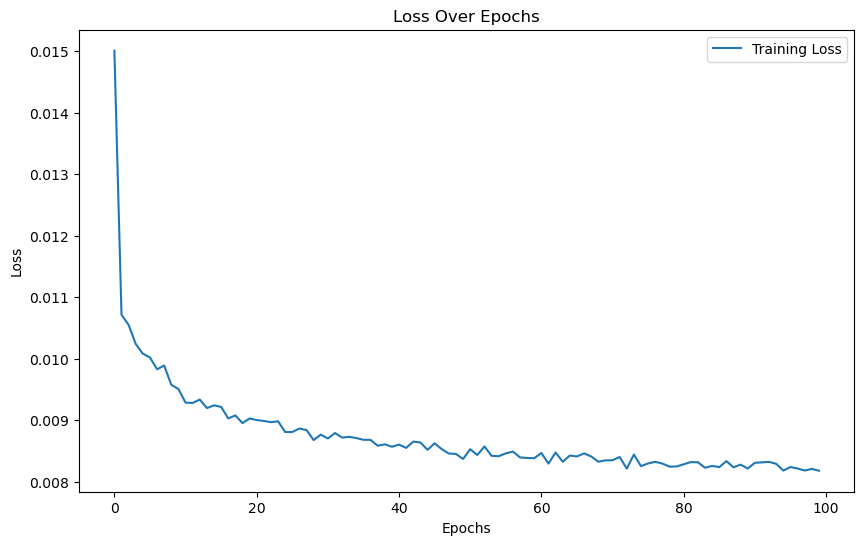

In [78]:
# Vẽ biểu đồ loss qua các epoch
loss_per_epoch = history.history['loss']
val_loss_per_epoch = history.history.get('val_loss', [])

plt.figure(figsize=(10,6))
plt.plot(range(len(loss_per_epoch)), loss_per_epoch, label='Training Loss')
if val_loss_per_epoch:
    plt.plot(range(len(val_loss_per_epoch)), val_loss_per_epoch, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

In [79]:
# Dự đoán mức tiêu thụ điện năng trên tập kiểm tra
y_pred = model_dnn.predict(Xx)

# Chuyển đổi dự đoán và giá trị thực tế thành DataFrame để dễ so sánh

results = pd.DataFrame({'Consumption': yy.values.flatten(), 'Predicted': y_pred.flatten()})
# Sắp xếp kết quả dự đoán theo giá trị thực tế (True)
results_sorted = results.sort_index()
results_sorted['datetime'] = data_test['DateTime'].values
results_sorted = results_sorted.set_index('datetime')
# Hiển thị kết quả đã sắp xếp
print(results_sorted)



69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step
                     Consumption  Predicted
datetime                                   
2024-01-01 00:00:00     0.268105   0.295544
2024-01-01 01:00:00     0.227515   0.238778
2024-01-01 02:00:00     0.181158   0.242169
2024-01-01 03:00:00     0.160863   0.241258
2024-01-01 04:00:00     0.101047   0.231670
...                          ...        ...
2024-03-31 19:00:00     0.327921   0.559389
2024-03-31 20:00:00     0.432386   0.560822
2024-03-31 21:00:00     0.407605   0.544432
2024-03-31 22:00:00     0.308481   0.501203
2024-03-31 23:00:00     0.219611   0.415489

[2183 rows x 2 columns]


In [80]:
print(f"Shape of yy: {yy.shape}")
print(f"Shape of y_pred: {y_pred.shape}")
print(f"Shape of data_test['DateTime']: {data_test['DateTime'].shape}")

Shape of yy: (2183, 1)
Shape of y_pred: (2183, 1)
Shape of data_test['DateTime']: (2183,)


<Axes: xlabel='datetime'>

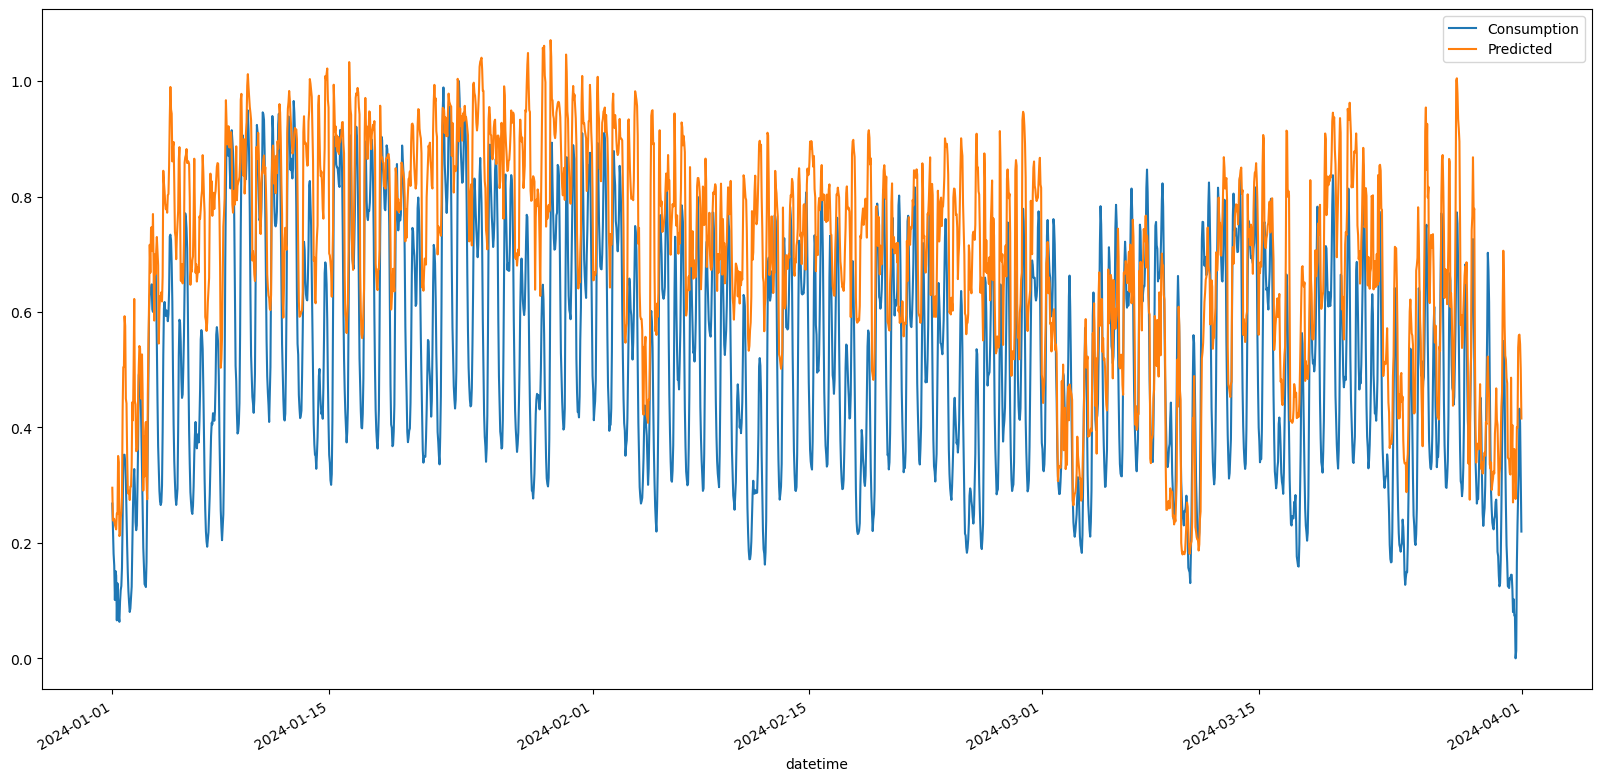

In [81]:
results_sorted.plot(figsize=(20,10))

## mô hình RNN


In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
X_rnn = X.values.reshape((X.shape[0], 1, X.shape[1]))
# Define the RNN model
# Xây dựng mô hình RNN
rnn_model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(X_rnn.shape[1], X_rnn.shape[2])),  # Input với dữ liệu đã reshape
    Dense(1)
])
# Compile the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error')


# Huấn luyện mô hình
history_rnn = rnn_model.fit(X_rnn, y, epochs=50, batch_size=32)


Epoch 1/50


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 2s 636us/step - loss: 0.0186
Epoch 2/50
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - loss: 0.0099
Epoch 3/50
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step - loss: 0.0096
Epoch 4/50
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 682us/step - loss: 0.0093
Epoch 5/50
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - loss: 0.0092
Epoch 6/50
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step - loss: 0.0089
Epoch 7/50
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 622us/step - loss: 0.0088
Epoch 8/50
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - loss: 0.0088
Epoch 9/50
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 645us/step - loss: 0.0087
Epoch 10/50
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - loss: 0.0087
Epoch 11/50
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 644us/step - loss: 0.0084
Epoch 12/50
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 634us/step - loss: 0.0085
Epoch 13/50
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 706us/step - loss: 0.0085
Epoch 14/50
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 656us/step - loss: 0.0084
Epoch 15/50


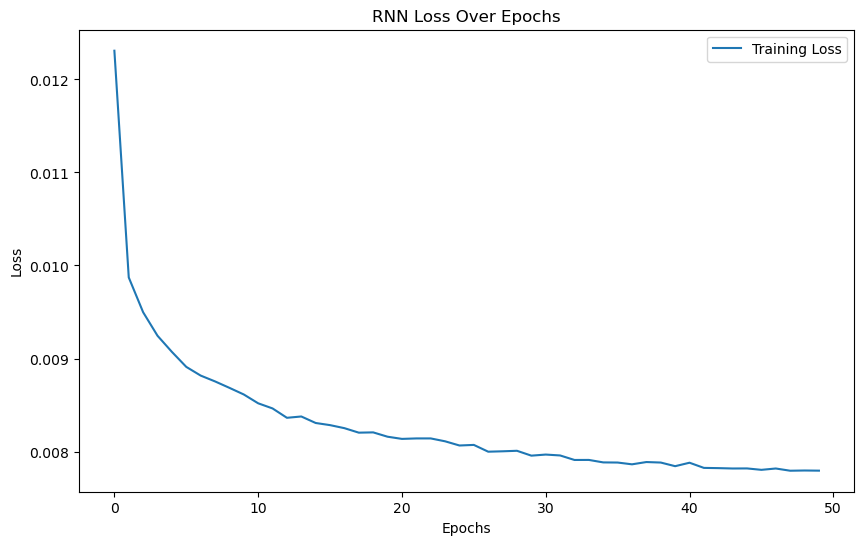

In [84]:
# Vẽ biểu đồ loss qua các epoch
loss_per_epoch_rnn = history_rnn.history['loss']
val_loss_per_epoch_rnn = history_rnn.history.get('val_loss', [])

plt.figure(figsize=(10,6))
plt.plot(range(len(loss_per_epoch_rnn)), loss_per_epoch_rnn, label='Training Loss')
if val_loss_per_epoch_rnn:
    plt.plot(range(len(val_loss_per_epoch_rnn)), val_loss_per_epoch_rnn, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('RNN Loss Over Epochs')
plt.legend()
plt.show()

In [85]:
rnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 64)                  │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,021 (54.77 KB)

 Trainable params: 4,673 (18.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,348 (36.52 KB)

In [86]:
# Kiểm tra kích thước của yy, y_pred_rnn và data_test['DateTime']
print(f"Shape of yy: {yy.shape}")
print(f"Shape of y_pred_rnn: {y_pred_rnn.shape}")
print(f"Shape of data_test['DateTime']: {data_test['DateTime'].shape}")


Shape of yy: (2183, 1)


NameError: name 'y_pred_rnn' is not defined

In [ ]:
# Dự đoán mức tiêu thụ điện năng trên tập kiểm tra
y_pred_rnn = model_dnn.predict(Xx)

# Chuyển đổi dự đoán và giá trị thực tế thành DataFrame để dễ so sánh

resultss = pd.DataFrame({'Consumption': yy.values.flatten(), 'Predicted': y_pred_rnn.flatten()})
# Sắp xếp kết quả dự đoán theo giá trị thực tế (True)
results_sorteds = resultss.sort_index()
results_sorteds['datetime'] = data_test['DateTime'].values
results_sorteds = results_sorteds.set_index('datetime')
# Hiển thị kết quả đã sắp xếp
print(results_sorteds)



In [ ]:
results_sorteds.plot()

## mô hình LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
lstm_model = Sequential([
    LSTM(64, activation='relu', input_shape=(X.shape[1], 1)),
    Dense(1)
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')


# Train the model (reshape data for LSTM)
history_lstm = lstm_model.fit(X, y, epochs=50, batch_size=32)


In [ ]:
# Vẽ biểu đồ loss qua các epoch
loss_per_epoch_lstm = history_lstm.history['loss']
val_loss_per_epoch_lstm = history_lstm.history.get('val_loss', [])

plt.figure(figsize=(10,6))
plt.plot(range(len(loss_per_epoch_lstm)), loss_per_epoch_lstm, label='Training Loss')
if val_loss_per_epoch_lstm:
    plt.plot(range(len(val_loss_per_epoch_lstm)), val_loss_per_epoch_lstm, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('ltsm Loss Over Epochs')
plt.legend()
plt.show()

In [ ]:
lstm_model.summary()

In [ ]:
# Dự đoán mức tiêu thụ điện năng trên tập kiểm tra
y_pred_lstm = lstm_model.predict(Xx)

resultsss = pd.DataFrame({'Consumption': yy.values.flatten(), 'Predicted': y_pred.flatten()})
# Sắp xếp kết quả dự đoán theo giá trị thực tế (True)
results_sortedsss = resultsss.sort_index()
results_sortedsss['datetime'] = data_test['DateTime'].values
results_sortedsss = results_sortedsss.set_index('datetime')
# Hiển thị kết quả đã sắp xếp
print(results_sortedsss)


In [ ]:
results_sortedsss.plot()

## MÔ HÌNH GRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Define the GRU model
gru_model = Sequential([
    GRU(64, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(1)
])

# Compile the model
gru_model.compile(optimizer='adam', loss='mean_squared_error')
X_train_gru = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_gru = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
# Train the model (reshape data for GRU)
history_gru = gru_model.fit(X_train_gru, y_train, epochs=50, batch_size=32, validation_data=(X_test_gru, y_test))


In [ ]:
loss_per_epoch_gru = history_gru.history['loss']
val_loss_per_epoch_gru = history_gru.history.get('val_loss', [])

plt.figure(figsize=(10,6))
plt.plot(range(len(loss_per_epoch_gru)), loss_per_epoch_gru, label='Training Loss')
if val_loss_per_epoch_lstm:
    plt.plot(range(len(val_loss_per_epoch_gru)), val_loss_per_epoch_gru, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('ltsm Loss Over Epochs')
plt.legend()
plt.show()

In [ ]:
gru_model.summary()

In [ ]:
# Dự đoán mức tiêu thụ điện năng trên tập kiểm tra
y_pred_gru = gru_model.predict(X_test_gru)

resultsss = pd.DataFrame({'Consumption': y_test, 'Predicted': y_pred_gru.flatten()})
# Sắp xếp kết quả dự đoán theo giá trị thực tế (True)
results_sortedsss = resultsss.sort_index()
results_sortedsss['datetime'] = dt.loc[results_sortedsss.index, 'DateTime']  # Thêm cột datetime
results_sortedsss = results_sortedsss.set_index('datetime')
# Hiển thị kết quả đã sắp xếp
print(results_sortedsss)
